## Contents
1) Dependencies<br>
2) Data Import<br>
3) High Level Insights<br>
4) Feature Enginnering<br>
5) Exploratory Data Analysis<br>
&emsp;A) Correlation Analysis<br>
&emsp;B) Time Series Analysis<br>
&emsp;C) Analysis of Accident_Severity, Number_of_Vehicles, Number_of_Casualties vs Did_Police_Officer_Attend_Scene_of_Accident<br>
&emsp;D) Analysis Light_Conditions, Weather_Conditions vs Did_Police_Officer_Attend_Scene_of_Accident<br>
&emsp;E) Ananlysis Police_Force, Local_Authority_(District) vs Did_Police_Officer_Attend_Scene_of_Accident<br>
6) Selecting features and target variables<br>
&emsp;A) Features Selection through EDA<br>
&emsp;B) Automated features Selection<br>
7) Building Models<br>
&emsp;A) Decision Trees<br>
&emsp;B) Random Forest <br>
&emsp;C) GaussianNB<br>
&emsp;D) Logistic Regression<br>
&emsp;E) Linear SVC<br>
&emsp;F) XGBoost<br>
&emsp;G) Stochastic Gradient Descent(Hyper Parameter Tuning)<br>
8) Conclusion & Things to do further

## 1) Dependencies

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 2) Data Import

In [52]:
df = pd.read_csv("DfTRoadSafety_Accidents_2014.csv")
#df.count()

## 3) High Level Insights

#### View top 5 Values for each attribute.

In [3]:
df.head(5).T

,0,1,2,3,4
Accident_Index,201401BS70001,201401BS70002,201401BS70003,201401BS70004,201401BS70006
Location_Easting_OSGR,524600,525780,526880,525580,527040
Location_Northing_OSGR,179020,178290,178430,179080,179030
Longitude,-0.206443,-0.189713,-0.173827,-0.192311,-0.171308
Latitude,51.4963,51.4895,51.4905,51.4967,51.4959
Police_Force,1,1,1,1,1
Accident_Severity,3,3,3,3,3
Number_of_Vehicles,2,2,2,1,2
Number_of_Casualties,1,1,1,1,1
Date,09/01/2014,20/01/2014,21/01/2014,15/01/2014,09/01/2014


#### Get column name, not null values count, and datatype of each attribute
It can be observed that `LSOA_of_Accident_Location` contains null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146322 entries, 0 to 146321
Data columns (total 32 columns):
Accident_Index                                 146322 non-null object
Location_Easting_OSGR                          146322 non-null int64
Location_Northing_OSGR                         146322 non-null int64
Longitude                                      146322 non-null float64
Latitude                                       146322 non-null float64
Police_Force                                   146322 non-null int64
Accident_Severity                              146322 non-null int64
Number_of_Vehicles                             146322 non-null int64
Number_of_Casualties                           146322 non-null int64
Date                                           146322 non-null object
Day_of_Week                                    146322 non-null int64
Time                                           146322 non-null object
Local_Authority_(District)                     146322 

#### As per Introduction tab in Safety Data Guide, the value "-1" is exported for NULL or out of range values

#### Get no of unique vales for each attribute

#### Observations and Inference:<br>    
`Location_Easting_OSGR`, `Location_Northing_OSGR`, `Longitude`, `Latitude` have high variability so we will exclude these variables from our analysis

In [53]:
df.nunique() 

Accident_Index                                 146322
Location_Easting_OSGR                           92575
Location_Northing_OSGR                          96296
Longitude                                      138878
Latitude                                       137376
Police_Force                                       51
Accident_Severity                                   3
Number_of_Vehicles                                 14
Number_of_Casualties                               26
Date                                              365
Day_of_Week                                         7
Time                                             1439
Local_Authority_(District)                        380
Local_Authority_(Highway)                         207
1st_Road_Class                                      6
1st_Road_Number                                  4384
Road_Type                                           6
Speed_limit                                         6
Junction_Detail             

#### Target variable distribution
We can observe that `Did_Police_Officer_Attend_Scene_of_Accident` data is skewed from this analysis

#### Inference
We have skewed distribution of data. Frequency of appearance of one of the category of target variable is high and therefore algorithms will have to trained accordingly. If this is not done then  ML algos will be inefficient in predicting for other category.

####To solve this problem will have to try adding more weightage to accidents with class 2 

In [6]:
df["Did_Police_Officer_Attend_Scene_of_Accident"].value_counts()

1    119607
2     26715
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

#### Get  columns list based on datatypes

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

int_columns = df.select_dtypes(include='int64').columns
float_columns = df.select_dtypes(include='float64').columns
object_columns = df.select_dtypes(include='object').columns

## 4) Feature Engineering

#### Format Date in Datetime format and add additional columns for month, day, and hour

Our dataset is very clean and hence as such no cleaning is required. 
We have balanced dataset. 
No missing values as such. 
Dataset has categorical variables and numerical variables properly populated. 
Only one thing that needs to be done is extracting one feature from time field, number of accidents at different hours in a day.



In [8]:
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour_of_Day'] = df['Time'].apply(to_hour)
df["isWeekend"] = pd.to_datetime(df['Date'], format='%d/%m/%Y').apply(lambda x:  1.0 if x.weekday()>=5 else 0.0)
df['Count'] = 1

## 5) Exploratory Data Analysis

### A) Correlation Analysis
1) Correlation Matrix1(Graphical)<br>
2) Correlation Matrix2(Numerical)<br>
#### Observations:<br>
1) `Locating_Easting_OSGR` and `Longitude` are correlated as expected<br>
2) `Locating_Northing_OSGR' and 'Latitude` are correlated as expected<br>
3) `Police_Force` and `Local_Authority_(District)` are correlated<br>
4) `Speed_limit` and `Urban_or_Rural_Area` are correlated as expected<br>
5) `Junction_Detail`, `Junction_Control` and `2nd_Road_Class` are correlated<br>
#### Inference:<br>
From above analysis we can drop of highly correlated features.

#### 1) Correlation Matrix1(Graphical)

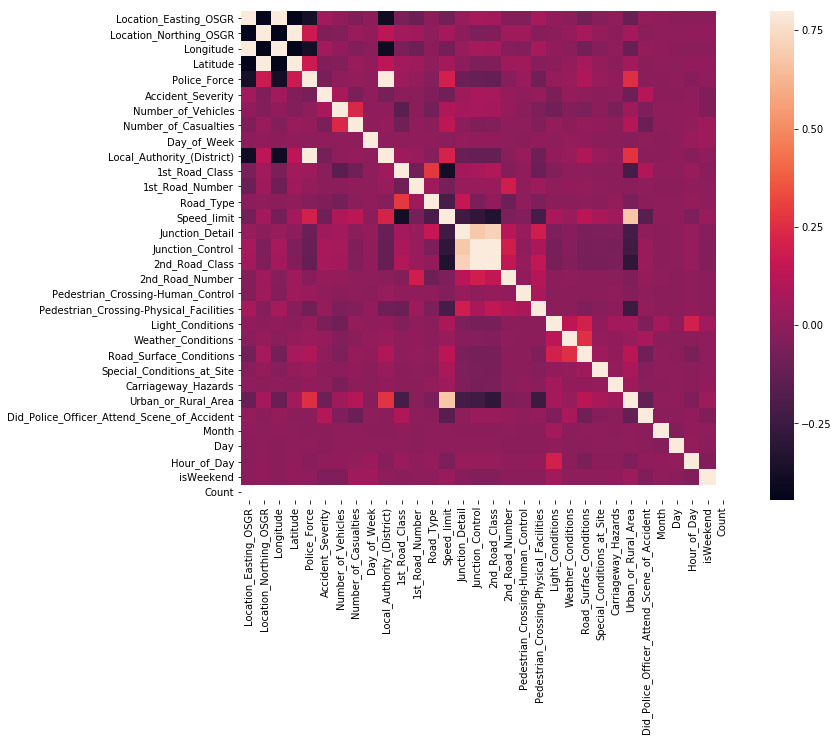

In [9]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

#### 2) Correlation Matrix2(Numerical)
#### Obsevations:
1) `Junction Control` and `2nd_Road_Class` are correlated ( 0.93 in matrix below)
#### Inference:
1) As both above features are highly correlated will drop `Junction Control` from our analysis

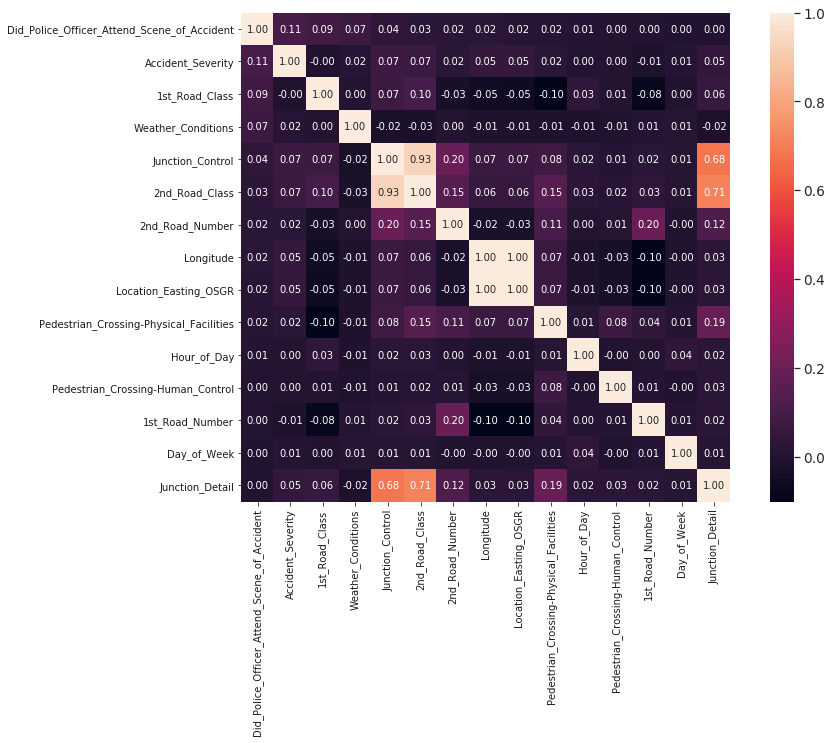

In [10]:
k = 15 #number of random variables for heatmap
plt.subplots(figsize=(14, 9))
cols = corrmat.nlargest(k, 'Did_Police_Officer_Attend_Scene_of_Accident')['Did_Police_Officer_Attend_Scene_of_Accident'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#plt.savefig('foo.png')

### B) Time Series Analysis
1) Average number of casualties  over hour of day and splitted by  day of week<br>
2) Monthly accidents distribution<br>
3) "Accident Count" vs "Day_of_Week" splitted by "Did_Police_Officer_Attend_Scene_of_Accident"<br>
4) "Accident Count" vs  "Hour of Day" splitted by "Did_Police_Officer_Attend_Scene_of_Accident"

#### 1) Average number of casualties  over hour of day and splitted by  day of week 
#### Observations:<br>
1) Number of casualties is different for weekends and weekdays
#### Inference:
1) This analysis doesnt give much information about the target variable.

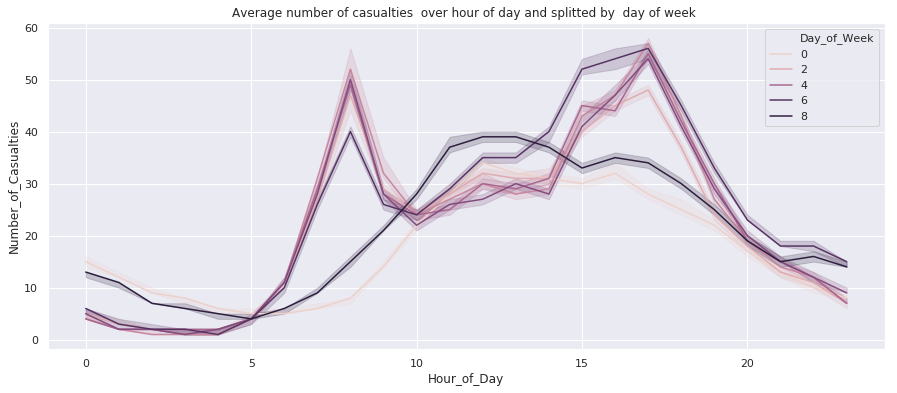

In [47]:
plt.figure(figsize=(15,6))
plt.title('Average number of casualties  over hour of day and splitted by  day of week ')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Casualities')
sns.set(style="darkgrid")
sns.lineplot(x="Hour_of_Day",y="Number_of_Casualties",hue="Day_of_Week",estimator=lambda x: sum(x)/52,data=df)

#### 2) Monthly accidents distribution
#### Observations:<br>
1)The maximum number of accidents happened in the month of October  followed by November.
#### Inference:
1) This analysis doesnt give much information about the target variable.

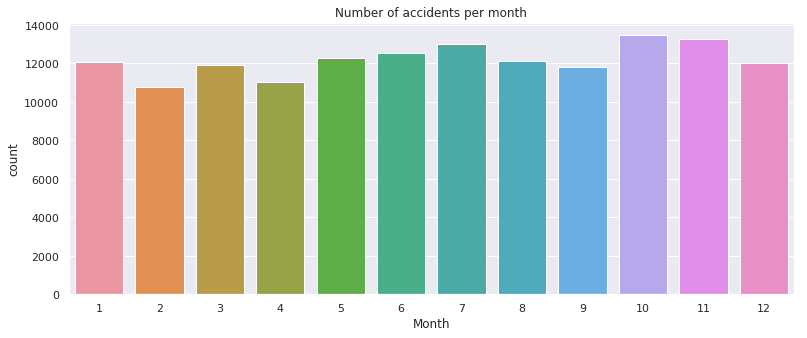

In [12]:
plt.figure(figsize=(13,5))
plt.title('Number of accidents per month')
plt.xlabel('Month')
plt.ylabel('Accident count')
x = sns.countplot(x="Month", data=df, order = [1,2,3,4,5,6,7,8,9,10,11,12])

#### 3) "Accident Count" vs "Day_of_Week" splitted by "Did_Police_Officer_Attend_Scene_of_Accident"
#### Observations:<br>
1) No of accidents is maximum on `Friday` and minimum on `Monday`
#### Inference:
1) Clearly we can create a variable which distinguish weekends vs weekday :: "isWeekend"

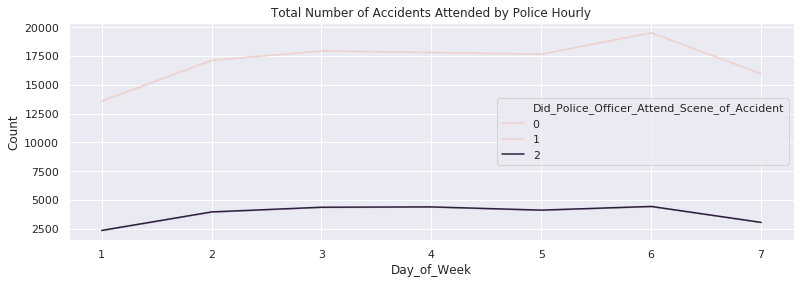

In [13]:
plt.figure(figsize=(13,4))
plt.title('Total Number of Accidents Attended by Police Hourly')
plt.xlabel('Day_of_Week')
plt.ylabel('Accident Count')
sns.lineplot(x = "Day_of_Week", y = "Count", hue = "Did_Police_Officer_Attend_Scene_of_Accident", estimator = lambda z: sum(z), data=df)

#### 4) "Accident Count" vs  "Hour of Day" splitted by "Did_Police_Officer_Attend_Scene_of_Accident"
#### Observations:<br>
1) No of accidents is maximum at `5PM` followed by `8AM`
#### Inference:
1) Here we can clearly infer that number of accidents varries based on hour in a day so we should use this feature for model training :: "Hour_of_Day"

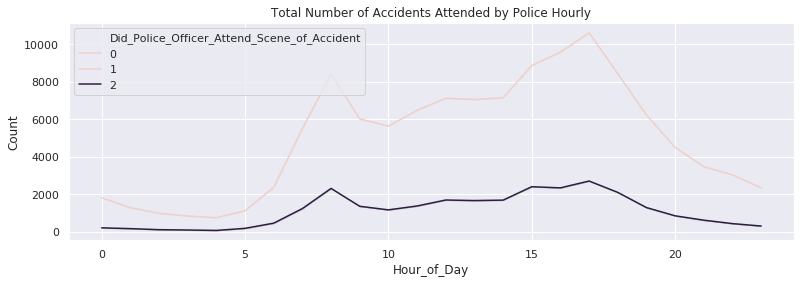

In [14]:
plt.figure(figsize=(13,4))
plt.title('Total Number of Accidents Attended by Police Hourly')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
sns.lineplot(x = "Hour_of_Day", y = "Count", hue = "Did_Police_Officer_Attend_Scene_of_Accident", estimator = lambda z: sum(z), data=df)

### C) Analysis of Accident_Severity, Number_of_Vehicles, Number_of_Casualties vs Did_Police_Officer_Attend_Scene_of_Accident
1) Accident_Severity vs Did_Police_Officer_Attend_Scene_of_Accident<br>
2) Number_of_Vehicles vs Did_Police_Officer_Attend_Scene_of_Accident<br>
3) Number_of_Casualties vs Did_Police_Officer_Attend_Scene_of_Accident<br>

#### 1) Accident_Severity vs Did_Police_Officer_Attend_Scene_of_Accident
#### Observations:<br>
1)Most of the accidents are of low severity

#### Inference:
1) Here we can infer that accident severity is contributing to target variable so we should include `Accident_Severity` for model training

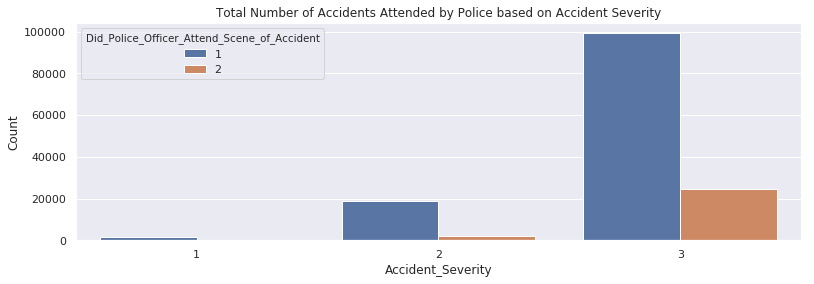

In [15]:
plt.figure(figsize=(13,4))
plt.title('Total Number of Accidents Attended by Police based on Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Accident Count')
sns.barplot(x="Accident_Severity",y="Count", hue="Did_Police_Officer_Attend_Scene_of_Accident", estimator = lambda z: sum(z), data=df)

#### 2) Number_of_Vehicles vs Did_Police_Officer_Attend_Scene_of_Accident
#### Observations:<br>
1) Number of vehices involved in most of the cases were 2 follwed by 3
#### Inference:
1) Here we can infer that number of vehicles is contributing to target variable so we should include `Number_of_Vehicles` for model training

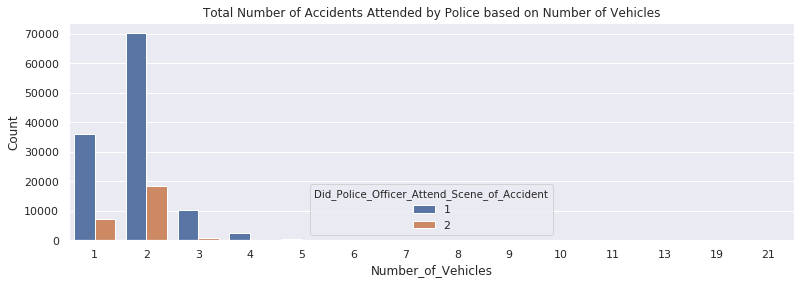

In [16]:
plt.figure(figsize=(13,4))
plt.title('Total Number of Accidents Attended by Police based on Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Accident Count')
sns.barplot(x="Number_of_Vehicles",y="Count", hue="Did_Police_Officer_Attend_Scene_of_Accident", estimator = lambda z: sum(z), data=df)

#### 3) Number_of_Casualties vs Did_Police_Officer_Attend_Scene_of_Accident
#### Observations:<br>
1) Number of casualities in most of the cases are 1
#### Inference:
1) Here we can infer that number of casualties is contributing to target variable so we should include `Number_of_Casualties` for model training

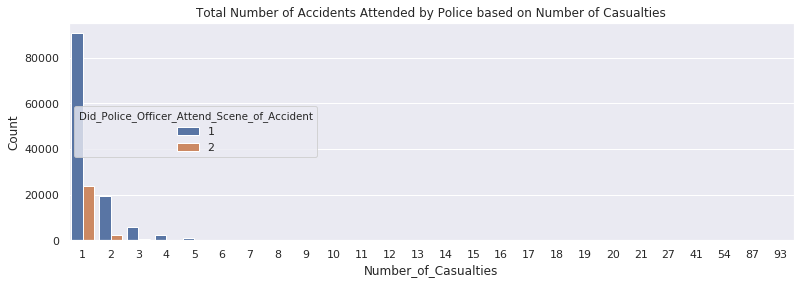

In [17]:
plt.figure(figsize=(13,4))
plt.title('Total Number of Accidents Attended by Police based on Number of Casualties')
plt.xlabel('Number_of_Casualties')
plt.ylabel('Accident Count')
sns.barplot(x="Number_of_Casualties",y="Count", hue="Did_Police_Officer_Attend_Scene_of_Accident", estimator = lambda z: sum(z), data=df)

### D) Analysis Light_Conditions, Weather_Conditions vs Did_Police_Officer_Attend_Scene_of_Accident
1) Light_Conditions vs Did_Police_Officer_Attend_Scene_of_Accident<br>
2) Weather_Conditions vs Did_Police_Officer_Attend_Scene_of_Accident

#### 1) Weather_Conditions vs Did_Police_Officer_Attend_Scene_of_Accident
#### Observations:<br>
1) Most of the accidents happened when weather category was 1(Fine no high winds) followed by 2(Raining no high winds)

#### Inference:
1) Here we can infer that weather conditions is contributing to target variable so we should include `Weather_Conditions` for model training

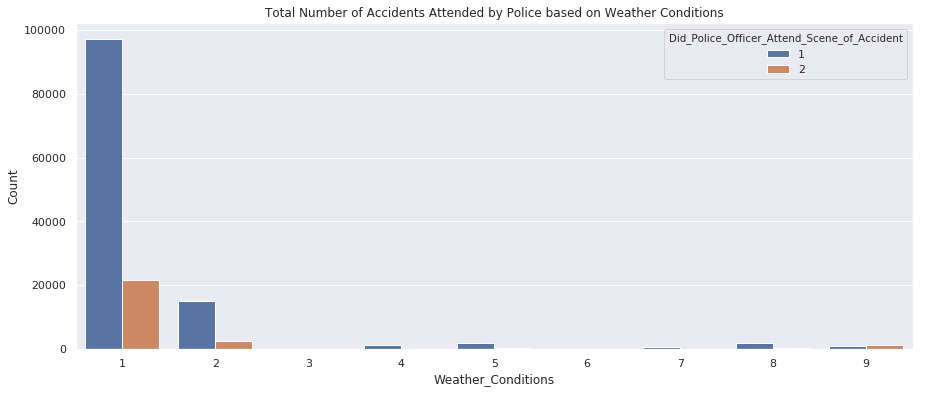

In [18]:
plt.figure(figsize=(15,6))
plt.title('Total Number of Accidents Attended by Police based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Accident Count')
sns.barplot(x="Weather_Conditions",y="Count", hue="Did_Police_Officer_Attend_Scene_of_Accident", estimator = lambda z: sum(z), data=df)

#### 2) Light_Conditions vs Did_Police_Officer_Attend_Scene_of_Accident
#### Observations:<br>
1) Most of the accidents happened when light category was 1(Daylight) followed by 4(Darkness - lights lit)

#### Inference:
1) We can clearly say that chance of police attending the accident scene seems to change based on light condition thus  `Light_Conditions` will be included in our model training

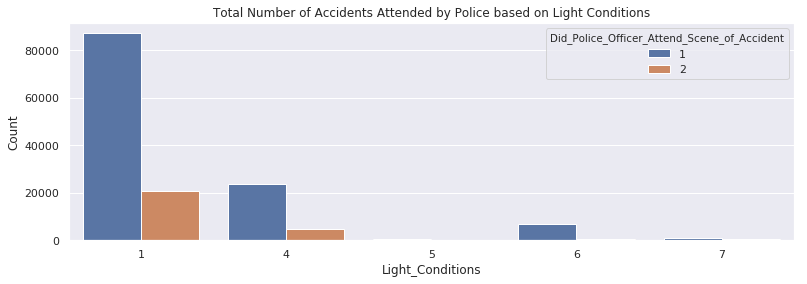

In [19]:
plt.figure(figsize=(13,4))
plt.title('Total Number of Accidents Attended by Police based on Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Accident Count')
sns.barplot(x="Light_Conditions",y="Count", hue="Did_Police_Officer_Attend_Scene_of_Accident", estimator = lambda z: sum(z), data=df)

### E) Ananlysis Police_Force, Local_Authority_(District) vs Did_Police_Officer_Attend_Scene_of_Accident
1) Police_Force vs Did_Police_Officer_Attend_Scene_of_Accident<br>

#### 1) Police_Force vs Did_Police_Officer_Attend_Scene_of_Accident

#### Observations:
1) `Police_Force` with category 1 attends most number of accidents

#### Inference:
1) This analysis doesnt give much information about the target variable.

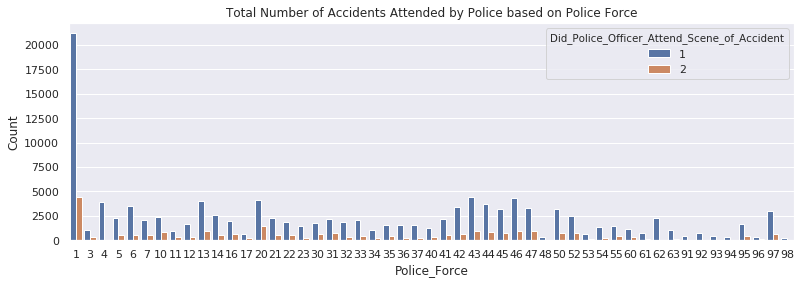

In [20]:
plt.figure(figsize=(13,4))
plt.title('Total Number of Accidents Attended by Police based on Police Force')
plt.xlabel('Police Force')
plt.ylabel('Accident Count')
sns.barplot(x="Police_Force",y="Count", hue="Did_Police_Officer_Attend_Scene_of_Accident", estimator = lambda z: sum(z), data=df)

### Analysis Urban_or_Rural_Area vs Did_Police_Officer_Attend_Scene_of_Accident

#### Observations:
1) `Urban_or_Rural_Area` with category 1 was attended in most number of accidents

#### Inference:
1) Clearly we can observe different trends for urban and rural area. Therefore will include `Urban_or_Rural_Area` in our model training 

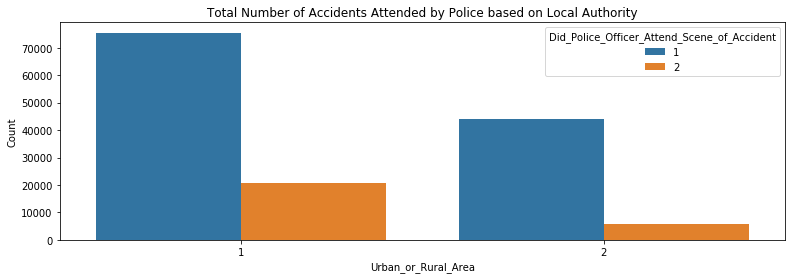

In [45]:
plt.figure(figsize=(13,4))
plt.title('Total Number of Accidents Attended by Police based on Local Authority')
plt.xlabel('Local Authority')
plt.ylabel('Accident Count')
sns.barplot(x="Urban_or_Rural_Area",y="Count", hue="Did_Police_Officer_Attend_Scene_of_Accident", estimator = lambda z: sum(z), data=df)

## 6) Feature selection

### A) Features Selection through EDA
    Have categorized features into group based on similarities which will be used in our 
    model training
    

In [9]:
severity_list = ["Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties"]
time_attributes = ["Day_of_Week" ,"Hour_of_Day", "Month", "isWeekend"]
weather_attributes = ["Weather_Conditions","Light_Conditions"]
road_attributes = ["1st_Road_Number","2nd_Road_Number", "1st_Road_Class", "Road_Surface_Conditions", "Road_Type", "Speed_limit" , "Junction_Detail", "Urban_or_Rural_Area"]
other_attributes = ["Police_Force", "Special_Conditions_at_Site", "Carriageway_Hazards", "Pedestrian_Crossing-Physical_Facilities", "Pedestrian_Crossing-Human_Control"]

highly_variable_features = set(["2nd_Road_Number","1st_Road_Number","Local_Authority_(District)","Location_Northing_OSGR","Location_Easting_OSGR"])

columns_final = list(set(severity_list + time_attributes + weather_attributes + road_attributes + other_attributes) - highly_variable_features)

X = df[columns_final]
Y = df["Did_Police_Officer_Attend_Scene_of_Accident"].replace({2:0.0,1:1.0})

### One Hot Encoding

In [10]:
###fit one hot encoder
from sklearn.preprocessing import OneHotEncoder
oneHotEncX = OneHotEncoder(categories="auto",sparse=False,categorical_features=None)
oneHotEncX.fit(X)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<type 'numpy.float64'>, handle_unknown='error', n_values=None,
       sparse=False)

## 7 ) Models Selection 
    Training and fine tuning multiple models in order to obtain best performing model for 
    our dataset
#### Divide the data into training and test sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
X_trainOHE, X_testOHE, y_trainOHE, y_testOHE = train_test_split(oneHotEncX.transform(X), Y, test_size=0.30)

#### Helper function

In [12]:
def print_results(y_test, y_pred):
    results = confusion_matrix(y_test, y_pred)
    dict_cr = classification_report(y_test, y_pred,output_dict=True)
    acc = accuracy_score(y_test, y_pred)
    performance_matrix = {"accuracy_score":acc,"Recall Class0": dict_cr["0.0"]["recall"],
                          "Recall Class1": dict_cr["1.0"]["recall"],"f1-score Class0":dict_cr["0.0"]["f1-score"],
                          "f1-score Class1":dict_cr["1.0"]["f1-score"],
                          "weighted avg recall":dict_cr["weighted avg"]["recall"],"weighted avg f1-score":dict_cr["weighted avg"]["f1-score"],
                          "confusion_matrix":results }
     
    print("=================Evaluating the Algorithm================")
    print("=========================================================")
    print("=================Confusion Matrix========================")
    print(results)
    print("=================Classification Report===================")
    print(classification_report(y_test, y_pred))
    acc_sgd = accuracy_score(y_test, y_pred)
    print("=================Accuracy %==============================")
    print("Accuracy: %.2f%%" % (acc * 100.0))
    print("=========================================================")
    return performance_matrix
    

### A) Decision Trees
#### Training and Making Predictions

In [13]:
classifier = DecisionTreeClassifier(criterion="entropy",  splitter= "random", min_samples_split = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
performance_matrix_dt = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[ 2562  5549]
 [ 6711 29075]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.28      0.32      0.29      8111
         1.0       0.84      0.81      0.83     35786

   micro avg       0.72      0.72      0.72     43897
   macro avg       0.56      0.56      0.56     43897
weighted avg       0.74      0.72      0.73     43897

=================Accuracy %==============================
Accuracy: 72.07%


### B) Random Forest
#### Training and Making Predictions

In [14]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
performance_matrix_rf = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[  996  7115]
 [ 1250 34536]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.44      0.12      0.19      8111
         1.0       0.83      0.97      0.89     35786

   micro avg       0.81      0.81      0.81     43897
   macro avg       0.64      0.54      0.54     43897
weighted avg       0.76      0.81      0.76     43897

=================Accuracy %==============================
Accuracy: 80.94%


### C) GaussianNB
#### Training and Making Predictions

In [15]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
performance_matrix_gnb = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[ 5051  3060]
 [13110 22676]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.28      0.62      0.38      8111
         1.0       0.88      0.63      0.74     35786

   micro avg       0.63      0.63      0.63     43897
   macro avg       0.58      0.63      0.56     43897
weighted avg       0.77      0.63      0.67     43897

=================Accuracy %==============================
Accuracy: 63.16%


### D) Logistic Regression
#### Training and Making Predictions

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
performance_matrix_lr = print_results(y_test, y_pred)

/shared/3QI_Release/dependencies/python_virtual_env_1/lib64/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[  246  7865]
 [  115 35671]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.68      0.03      0.06      8111
         1.0       0.82      1.00      0.90     35786

   micro avg       0.82      0.82      0.82     43897
   macro avg       0.75      0.51      0.48     43897
weighted avg       0.79      0.82      0.74     43897

=================Accuracy %==============================
Accuracy: 81.82%


### E) Linear SVC 
#### Training and Making Predictions

In [17]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
performance_matrix_svc = print_results(y_test, y_pred)

/shared/3QI_Release/dependencies/python_virtual_env_1/lib64/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[    2  8109]
 [    0 35786]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      8111
         1.0       0.82      1.00      0.90     35786

   micro avg       0.82      0.82      0.82     43897
   macro avg       0.91      0.50      0.45     43897
weighted avg       0.85      0.82      0.73     43897

=================Accuracy %==============================
Accuracy: 81.53%


### F) XGBoost
#### Training and Making Predictions

In [18]:
classifier = XGBClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,
                           max_features='sqrt', subsample=0.8, random_state=10, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
performance_matrix_xgb = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[  440  7671]
 [  198 35588]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.69      0.05      0.10      8111
         1.0       0.82      0.99      0.90     35786

   micro avg       0.82      0.82      0.82     43897
   macro avg       0.76      0.52      0.50     43897
weighted avg       0.80      0.82      0.75     43897

=================Accuracy %==============================
Accuracy: 82.07%


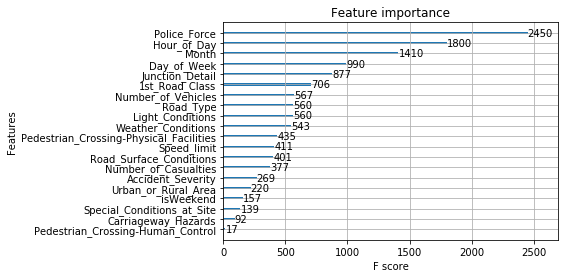

In [19]:
from xgboost import plot_importance
plot_importance(classifier)

### G) Stochastic Gradient Descent
    In the below given experiments we will try to find the optimal hyper parameter values for recall.

In [20]:
loss_functions = ["hinge", "log", "modified_huber","squared_hinge","perceptron"]
penalty_functions = ["l2","none", "l1","elasticnet"]
learning_rate = ["optimal","constant","invscaling","adaptive"]

From Experiment 1 to 5 we are trying to find the best hyper parameter values for `loss_functions`.

#### Experiment G.1: with default parameters ::
    loss="hinge"
##### Observations:
    The recall value `class 0` is very low

In [21]:
sgd = SGDClassifier(loss="hinge", penalty="l2", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="optimal", eta0=0.0, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd1 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[  132  7979]
 [  578 35208]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.19      0.02      0.03      8111
         1.0       0.82      0.98      0.89     35786

   micro avg       0.81      0.81      0.81     43897
   macro avg       0.50      0.50      0.46     43897
weighted avg       0.70      0.81      0.73     43897

=================Accuracy %==============================
Accuracy: 80.51%


#### Experiment G.2: With parameters ::
    loss="log"
##### Observations:
    The recall value `class 0` is still low

In [22]:
sgd = SGDClassifier(loss="log", penalty="l2", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="optimal", eta0=0.0, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd2 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[  146  7965]
 [  647 35139]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.18      0.02      0.03      8111
         1.0       0.82      0.98      0.89     35786

   micro avg       0.80      0.80      0.80     43897
   macro avg       0.50      0.50      0.46     43897
weighted avg       0.70      0.80      0.73     43897

=================Accuracy %==============================
Accuracy: 80.38%


#### Experiment G.3: With parameters ::
    loss="modified_huber"
##### Observations:
    The recall value `class 0` is still low

In [23]:
sgd = SGDClassifier(loss="modified_huber", penalty="l2", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="optimal", eta0=0.0, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd3 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[  109  8002]
 [  465 35321]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.19      0.01      0.03      8111
         1.0       0.82      0.99      0.89     35786

   micro avg       0.81      0.81      0.81     43897
   macro avg       0.50      0.50      0.46     43897
weighted avg       0.70      0.81      0.73     43897

=================Accuracy %==============================
Accuracy: 80.71%


#### Experiment G.4: With parameters ::
    loss="squared_hinge"
##### Observations:
    We observe that the recall value of class0 has increased but at the cost of decrease in recall value of class1

In [24]:
sgd = SGDClassifier(loss="squared_hinge", penalty="l2", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="optimal", eta0=0.0, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd4 = print_results(y_test, y_pred)

/shared/3QI_Release/dependencies/python_virtual_env_1/lib64/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[ 3373  4738]
 [14826 20960]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.19      0.42      0.26      8111
         1.0       0.82      0.59      0.68     35786

   micro avg       0.55      0.55      0.55     43897
   macro avg       0.50      0.50      0.47     43897
weighted avg       0.70      0.55      0.60     43897

=================Accuracy %==============================
Accuracy: 55.43%


#### Experiment G.5: With parameters ::
    loss="perceptron"
##### Observations:
    The recall value `class 0` is very low

In [25]:
sgd = SGDClassifier(loss="perceptron", penalty="l2", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="optimal", eta0=0.0, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd5 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[  486  7625]
 [ 2031 33755]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.19      0.06      0.09      8111
         1.0       0.82      0.94      0.87     35786

   micro avg       0.78      0.78      0.78     43897
   macro avg       0.50      0.50      0.48     43897
weighted avg       0.70      0.78      0.73     43897

=================Accuracy %==============================
Accuracy: 78.00%


##### We found that with loss="squared_hinge" the recall value for class0 and class1 are comparable.
    Now we will take loss = "squared_hinge"  and fine tune other paramenters

#### Experiment G.6: With parameters ::
    loss="squared_hinge"
    penalty="none"
##### Observations:
    The recall value `class 0` is .36

In [26]:
sgd = SGDClassifier(loss="squared_hinge", penalty="none", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="optimal", eta0=0.0, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd6 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[ 2933  5178]
 [13071 22715]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.18      0.36      0.24      8111
         1.0       0.81      0.63      0.71     35786

   micro avg       0.58      0.58      0.58     43897
   macro avg       0.50      0.50      0.48     43897
weighted avg       0.70      0.58      0.63     43897

=================Accuracy %==============================
Accuracy: 58.43%


#### Experiment G.7: With parameters ::
    loss="squared_hinge"
    penalty="l1"
##### Observations:
    The recall value `class 0` is .31

In [27]:
sgd = SGDClassifier(loss="squared_hinge", penalty="l1", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="optimal", eta0=0.0, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd7 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[ 2537  5574]
 [11203 24583]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.18      0.31      0.23      8111
         1.0       0.82      0.69      0.75     35786

   micro avg       0.62      0.62      0.62     43897
   macro avg       0.50      0.50      0.49     43897
weighted avg       0.70      0.62      0.65     43897

=================Accuracy %==============================
Accuracy: 61.78%


#### Experiment G.8: With parameters ::
    loss="squared_hinge"
    penalty="elasticnet"
##### Observations:
    The recall value `class 0` and class1 are comparable

In [28]:
sgd = SGDClassifier(loss="squared_hinge", penalty="elasticnet", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="optimal", eta0=0.0, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd8 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[ 3445  4666]
 [15300 20486]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.18      0.42      0.26      8111
         1.0       0.81      0.57      0.67     35786

   micro avg       0.55      0.55      0.55     43897
   macro avg       0.50      0.50      0.46     43897
weighted avg       0.70      0.55      0.60     43897

=================Accuracy %==============================
Accuracy: 54.52%


##### We observed that with penalty="l2" and penalty="elasticnet" are giving best recall values.
    Taking penalty="l2", we will try to fine tune learning_rate (Experiet 9 to 11)
    And Taking penalty="elasticnet", we will try to fine tune learning_rate (Experiet 12 to 14)

#### Experiment G.9: With parameters ::
    loss="squared_hinge"
    penalty="l2"
    learning_rate="constant"
##### Observations:
    The recall value `class 0` and class1 are comparable

In [29]:
sgd = SGDClassifier(loss="squared_hinge", penalty="l2", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="constant", eta0=.5, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd9 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[ 4269  3842]
 [18694 17092]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.19      0.53      0.27      8111
         1.0       0.82      0.48      0.60     35786

   micro avg       0.49      0.49      0.49     43897
   macro avg       0.50      0.50      0.44     43897
weighted avg       0.70      0.49      0.54     43897

=================Accuracy %==============================
Accuracy: 48.66%


#### Experiment G.10: With parameters ::
    loss="squared_hinge"
    penalty="l2"
    learning_rate="invscaling"
##### Observations:
    The recall value `class 0` is .3

In [30]:
sgd = SGDClassifier(loss="squared_hinge", penalty="l2", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="invscaling", eta0=1.0, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd10 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[ 2405  5706]
 [10640 25146]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.18      0.30      0.23      8111
         1.0       0.82      0.70      0.75     35786

   micro avg       0.63      0.63      0.63     43897
   macro avg       0.50      0.50      0.49     43897
weighted avg       0.70      0.63      0.66     43897

=================Accuracy %==============================
Accuracy: 62.76%


#### Experiment G.11: With parameters ::
    loss="squared_hinge"
    penalty="l2"
    learning_rate="adaptive"
##### Observations:
    The recall value `class 0` is .01

In [31]:
sgd = SGDClassifier(loss="squared_hinge", penalty="l2", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=5000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="adaptive", eta0=.1, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd11 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[  107  8004]
 [  455 35331]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.19      0.01      0.02      8111
         1.0       0.82      0.99      0.89     35786

   micro avg       0.81      0.81      0.81     43897
   macro avg       0.50      0.50      0.46     43897
weighted avg       0.70      0.81      0.73     43897

=================Accuracy %==============================
Accuracy: 80.73%


#### Experiment G.12: With parameters ::
    loss="squared_hinge"
    penalty="elasticnet"
    learning_rate="constant"
##### Observations:
    The recall value `class 0` increased substantially to .83 and for class1 it decreased to .17

In [32]:
sgd = SGDClassifier(loss="squared_hinge", penalty="elasticnet", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="constant", eta0=.1, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd12= print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[ 2110  6001]
 [ 9049 26737]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.19      0.26      0.22      8111
         1.0       0.82      0.75      0.78     35786

   micro avg       0.66      0.66      0.66     43897
   macro avg       0.50      0.50      0.50     43897
weighted avg       0.70      0.66      0.68     43897

=================Accuracy %==============================
Accuracy: 65.72%


#### Experiment G.13: With parameters ::
    loss="perceptron"
    penalty="elasticnet"
    learning_rate="invscaling"
##### Observations:
    The recall value `class 0` is very low i.e .01

In [33]:
sgd = SGDClassifier(loss="squared_hinge", penalty="elasticnet", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="invscaling", eta0=.1, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd13 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[  111  8000]
 [  461 35325]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.19      0.01      0.03      8111
         1.0       0.82      0.99      0.89     35786

   micro avg       0.81      0.81      0.81     43897
   macro avg       0.50      0.50      0.46     43897
weighted avg       0.70      0.81      0.73     43897

=================Accuracy %==============================
Accuracy: 80.73%


#### Experiment G.14: With parameters ::
    loss="perceptron"
    penalty="elasticnet"
    learning_rate="adaptive"
##### Observations:
    The recall value `class 0` is .38 and for class1 is .64 and seems to be the best model

In [34]:
sgd = SGDClassifier(loss="squared_hinge", penalty="elasticnet", alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                    max_iter=1000, tol=0.0001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                    random_state=None, learning_rate="adaptive", eta0=.1, power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, n_iter_no_change=50, class_weight=None, warm_start=False, average=False)
sgd.fit(X_trainOHE, y_trainOHE)
y_pred = sgd.predict(X_testOHE)
performance_matrix_sgd14 = print_results(y_test, y_pred)

=================Evaluating the Algorithm================
=================Confusion Matrix========================
[[  282  7829]
 [ 1210 34576]]
=================Classification Report===================
              precision    recall  f1-score   support

         0.0       0.19      0.03      0.06      8111
         1.0       0.82      0.97      0.88     35786

   micro avg       0.79      0.79      0.79     43897
   macro avg       0.50      0.50      0.47     43897
weighted avg       0.70      0.79      0.73     43897

=================Accuracy %==============================
Accuracy: 79.41%


Thus with paraeters set to (loss="perceptron", penalty="elasticnet", learning_rate="adaptive") with SGDClassifier Model gives the best results

## 7) Conclusion
After applying the following classification models:<br>
&emsp;A) Decision Trees<br>
&emsp;B) Random Forest <br>
&emsp;C) GaussianNB<br>
&emsp;D) Logistic Regression<br>
&emsp;E) Linear SVC<br>
&emsp;F) XGBoost<br>
&emsp;G) Stochastic Gradient Descent<br>

In [43]:
print("Machine Learning algorithm scores")
sgd_list = ["Stochastic Gradient Descent" + str(c+1) for c in range(14)]
list1 = [' Decision Trees','GaussianNB','XGBoost', 'Random Forest', 'Logistic Regression','Linear SVC'] + sgd_list
variable_list1 = [performance_matrix_dt, performance_matrix_gnb, performance_matrix_xgb, performance_matrix_rf,
               performance_matrix_lr, performance_matrix_svc]
sgd_list = [performance_matrix_sgd1,performance_matrix_sgd2,performance_matrix_sgd3,performance_matrix_sgd4,
            performance_matrix_sgd5,performance_matrix_sgd6,performance_matrix_sgd7,performance_matrix_sgd8,
            performance_matrix_sgd9,performance_matrix_sgd10,performance_matrix_sgd11,performance_matrix_sgd12,
            performance_matrix_sgd13,performance_matrix_sgd14]
variable_final = variable_list1 +  sgd_list

df_results = pd.DataFrame(variable_final)
df_results.index = list1
df_results["recall_avg"] = (df_results["Recall Class0"] + df_results["Recall Class1"])/2
df_results
df_results.sort_values(by='recall_avg', ascending=False)

Machine Learning algorithm scores


,Recall Class0,Recall Class1,accuracy_score,confusion_matrix,f1-score Class0,f1-score Class1,weighted avg f1-score,weighted avg recall,recall_avg
GaussianNB,0.622735,0.633656,0.631638,"[[5051, 3060], [13110, 22676]]",0.384516,0.737167,0.672007,0.631638,0.628195
Decision Trees,0.315867,0.812469,0.720710,"[[2562, 5549], [6711, 29075]]",0.294754,0.825877,0.727740,0.720710,0.564168
Random Forest,0.122796,0.965070,0.809440,"[[996, 7115], [1250, 34536]]",0.192334,0.891977,0.762701,0.809440,0.543933
XGBoost,0.054247,0.994467,0.820739,"[[440, 7671], [198, 35588]]",0.100583,0.900449,0.752655,0.820739,0.524357
Logistic Regression,0.030329,0.996786,0.818211,"[[246, 7865], [115, 35671]]",0.058074,0.899397,0.743943,0.818211,0.513558
Stochastic Gradient Descent12,0.260141,0.747136,0.657152,"[[2110, 6001], [9049, 26737]]",0.218993,0.780369,0.676642,0.657152,0.503638
Stochastic Gradient Descent9,0.526322,0.477617,0.486616,"[[4269, 3842], [18694, 17092]]",0.274763,0.602680,0.542090,0.486616,0.501970
Stochastic Gradient Descent5,0.059919,0.943246,0.780031,"[[486, 7625], [2031, 33755]]",0.091457,0.874867,0.730114,0.780031,0.501582
Stochastic Gradient Descent4,0.415855,0.585704,0.554320,"[[3373, 4738], [14826, 20960]]",0.256404,0.681803,0.603201,0.554320,0.500779
Stochastic Gradient Descent14,0.034768,0.966188,0.794086,"[[282, 7829], [1210, 34576]]",0.058732,0.884398,0.731837,0.794086,0.500478


From the original dataset with 146322 number of records, we have created a 70:30 split for training(102425) and testing(43897) respectively.<br>

The target variable has records distributed into 2 classes, class1( 119607) and class2(26715).<br>

Wanted to optimize the recall value for both the classes to find the best model.<br>Apart from applying different models have done hyper parameter tuning for Stochastic Gradient Descent.From previous experience felt SGD will map to this use case and evaluation criteria better.<br>

After runnimg multiple experiments by tuning Hyper parmeters Stochastic Gradient Descent experiments where giving good results but basic `GaussianNB` is working better based on average value of recall both classes followd by `Decision Tree`<br>

Given more time would have had a word with business on which metric is most important to them and  experimented (hyper parameter tuning)  on other models `GaussianNB` and `XGBoost` etc...<br>